In [47]:
!pip install backtesting
!pip install pandas_ta
!pip install plotly
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install numpy
!pip install pandas


### 1 - Import test data

In [48]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("/content/5min_N50_10yr.csv")
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00+05:30,8285.45,8301.30,8285.45,8301.20,0
1,2015-01-09 09:20:00+05:30,8300.50,8303.00,8293.25,8301.00,0
2,2015-01-09 09:25:00+05:30,8301.65,8302.55,8286.80,8294.15,0
3,2015-01-09 09:30:00+05:30,8294.10,8295.75,8280.65,8288.50,0
4,2015-01-09 09:35:00+05:30,8289.10,8290.45,8278.00,8283.45,0


In [49]:

df=df[df.high!=df.low]
df.set_index("date", inplace=True)

In [50]:
df["EMA"]=ta.ema(df.close, length=30)
df['RSI']=ta.rsi(df.close, length=10)
my_bbands = ta.bbands(df.close, length=15, std=1.5)
df['ATR']=ta.atr(df.high, df.low, df.close, length=7)
df=df.join(my_bbands)
df

,open,high,low,close,volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5
date,,,,,,,,,,,,,
2015-01-09 09:15:00+05:30,8285.45,8301.30,8285.45,8301.20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09 09:20:00+05:30,8300.50,8303.00,8293.25,8301.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09 09:25:00+05:30,8301.65,8302.55,8286.80,8294.15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09 09:30:00+05:30,8294.10,8295.75,8280.65,8288.50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09 09:35:00+05:30,8289.10,8290.45,8278.00,8283.45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 15:05:00+05:30,14338.40,14349.70,14319.05,14319.05,0,14381.544779,35.904631,40.738685,14339.905445,14400.160000,14460.414555,0.836860,-0.173061
2021-03-25 15:10:00+05:30,14319.15,14320.25,14274.15,14299.00,0,14376.219309,33.109348,41.504587,14322.448207,14393.640000,14464.831793,0.989212,-0.164683
2021-03-25 15:15:00+05:30,14298.90,14315.80,14287.55,14299.75,0,14371.285805,33.325093,39.611075,14307.258675,14385.453333,14463.647992,1.087135,-0.048013


In [51]:
print(df.head())

                              open     high      low    close  volume  EMA  \
date                                                                         
2015-01-09 09:15:00+05:30  8285.45  8301.30  8285.45  8301.20       0  NaN   
2015-01-09 09:20:00+05:30  8300.50  8303.00  8293.25  8301.00       0  NaN   
2015-01-09 09:25:00+05:30  8301.65  8302.55  8286.80  8294.15       0  NaN   
2015-01-09 09:30:00+05:30  8294.10  8295.75  8280.65  8288.50       0  NaN   
2015-01-09 09:35:00+05:30  8289.10  8290.45  8278.00  8283.45       0  NaN   

                           RSI  ATR  BBL_15_1.5  BBM_15_1.5  BBU_15_1.5  \
date                                                                      
2015-01-09 09:15:00+05:30  NaN  NaN         NaN         NaN         NaN   
2015-01-09 09:20:00+05:30  NaN  NaN         NaN         NaN         NaN   
2015-01-09 09:25:00+05:30  NaN  NaN         NaN         NaN         NaN   
2015-01-09 09:30:00+05:30  NaN  NaN         NaN         NaN         NaN   
201

In [52]:
def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()

    df_slice = df_slice.loc[current_candle-backcandles:current_candle, ["open", "close", "EMA"]]
    dnt = 0 if (df_slice[["open", "close"]].max(axis=1) >= df_slice["EMA"]).any() else 1
    upt = 0 if (df_slice[["open", "close"]].min(axis=1) <= df_slice["EMA"]).any() else 1

    if upt==1 and dnt==1:
        return 3
    elif upt==1:
        return 2
    elif dnt==1:
        return 1
    else:
        return 0

df=df[-10000:-1]
#ema_signal(df, 1313, 5)
from tqdm import tqdm
tqdm.pandas()
df.reset_index(inplace=True)
#df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)

In [53]:
print(df.head())

                        date      open      high       low     close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  
0  11479.136823    0.381886    0.409493  
1  11479.800729    0

In [54]:
def total_signal(df, current_candle, backcandles):
    if (ema_signal(df, current_candle, backcandles)==2
        and df.close[current_candle]<=df['BBL_15_1.5'][current_candle]
        #and df.RSI[current_candle]<60
        ):
            return 2
    if (ema_signal(df, current_candle, backcandles)==1
        and df.close[current_candle]>=df['BBU_15_1.5'][current_candle]
        #and df.RSI[current_candle]>40
        ):

            return 1
    return 0

df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)

100%|██████████| 9999/9999 [02:36<00:00, 63.81it/s]
<ipython-input-54-7a49e4fb66f1>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df[df.TotalSignal != 0].head(10)

,date,open,high,low,close,volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,TotalSignal
544,2020-09-22 11:55:00+05:30,11167.40,11183.50,11165.75,11181.50,0,11181.903883,56.448421,20.061659,11139.762131,11159.966667,11180.171202,0.362090,1.032884,1
615,2020-09-23 11:35:00+05:30,11215.15,11223.20,11211.05,11212.15,0,11210.557438,47.511420,12.380586,11212.555970,11221.353333,11230.150697,0.156797,-0.023073,2
707,2020-09-24 13:00:00+05:30,10925.30,10937.05,10919.85,10934.65,0,10935.178775,58.792376,15.702961,10900.982208,10914.893333,10928.804458,0.254902,1.210103,1
1076,2020-10-01 12:30:00+05:30,11405.25,11405.25,11393.30,11401.75,0,11393.549867,46.984309,9.397736,11403.015067,11409.920000,11416.824933,0.121034,-0.091606,2
1208,2020-10-06 11:00:00+05:30,11590.20,11590.20,11577.90,11585.45,0,11575.200762,49.025369,12.994941,11586.316002,11596.833333,11607.350664,0.181383,-0.041170,2
1212,2020-10-06 11:20:00+05:30,11593.25,11595.90,11582.55,11582.75,0,11578.726629,45.496714,11.390335,11584.764409,11596.000000,11607.235591,0.193784,-0.089644,2
1283,2020-10-07 11:00:00+05:30,11718.85,11719.20,11701.70,11708.30,0,11697.137139,46.039583,14.974819,11716.401215,11729.166667,11741.932118,0.217670,-0.317310,2
1284,2020-10-07 11:05:00+05:30,11707.95,11715.50,11702.75,11711.85,0,11698.086356,49.081179,14.656987,11715.185067,11728.816667,11742.448266,0.232446,-0.122329,2
1285,2020-10-07 11:10:00+05:30,11712.60,11721.25,11710.25,11710.60,0,11698.893688,48.022152,14.134561,11712.346437,11727.583333,11742.820229,0.259847,-0.057309,2
1377,2020-10-08 12:35:00+05:30,11884.00,11885.10,11873.20,11875.10,0,11870.827732,44.387243,9.063783,11875.602351,11883.363333,11891.124316,0.130619,-0.032364,2


In [56]:
print(df.head())

                        date      open      high       low     close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  TotalSignal  
0  11479.136823    0.381886    0.409493          

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close']),

                go.Scatter(x=dfpl.index, y=dfpl['BBL_15_1.5'],
                           line=dict(color='green', width=1),
                           name="BBL"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_15_1.5'],
                           line=dict(color='green', width=1),
                           name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA'],
                           line=dict(color='black', width=1),
                           name="EMA")           ])

fig.show()

In [58]:
print(df.head())

                        date      open      high       low     close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  TotalSignal  
0  11479.136823    0.381886    0.409493          

In [59]:
def SIGNAL():
    return df.TotalSignal

In [60]:
df_subset = df.iloc[:500]  # Adjust the subset as necessary
fig = go.Figure(data=[
    go.Candlestick(x=df_subset.index, open=df_subset['open'], high=df_subset['high'], low=df_subset['low'], close=df_subset['close']),
    go.Scatter(x=df_subset.index, y=df_subset['BBL_15_1.5'], line=dict(color='green', width=1), name="BBL"),
    go.Scatter(x=df_subset.index, y=df_subset['BBU_15_1.5'], line=dict(color='green', width=1), name="BBU"),
    go.Scatter(x=df_subset.index, y=df_subset['EMA'], line=dict(color='black', width=1), name="EMA"),
    go.Scatter(x=df_subset.index, y=df_subset['TotalSignal'], line=dict(color='blue', width=1), name="Signal")
])
fig.show()

In [61]:
from backtesting import Strategy
from backtesting import Backtest
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'})
print(df.columns)
"""class MyStrat(Strategy):
    mysize = 0.99
    slcoef = 1.2
    TPSLRatio = 2
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if len(self.trades)>0:
            if self.trades[-1].is_long and self.data.RSI[-1]>=90:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
                self.trades[-1].close()

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)"""
class MyStrat(Strategy):
    mysize = 0.99
    slcoef = 1.2
    TPSLRatio = 2
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if len(self.trades)>0:
            if self.trades[-1].is_long and self.data.RSI[-1]>=90:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
                self.trades[-1].close()

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*(TPSLRatio)+1000
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr   # Stop-loss should be above entry for short orders
            tp1 = self.data.Close[-1] - slatr*(TPSLRatio)-1000  # Take-profit should be below entry
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(df, MyStrat, cash=250, margin=1/30, commission=0.05)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 21)],
                    TPSLRatio=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

Index(['date', 'Open', 'High', 'Low', 'Close', 'volume', 'EMA', 'RSI', 'ATR',
       'BBL_15_1.5', 'BBM_15_1.5', 'BBU_15_1.5', 'BBB_15_1.5', 'BBP_15_1.5',
       'TotalSignal'],
      dtype='object')


<ipython-input-61-19aa3b6a922d>:62: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

<ipython-input-61-19aa3b6a922d>:62: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Start                                     0.0
End                                    9998.0
Duration                               9998.0
Exposure Time [%]                         0.0
Equity Final [$]                        250.0
Equity Peak [$]                         250.0
Return [%]                                0.0
Buy & Hold Return [%]               24.985375
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                  0.0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

In [62]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.0,TPSLRatio=1.0)>

In [63]:
bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1427', ...)

In [64]:
print(df.head())

                        date      Open      High       Low     Close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  TotalSignal  
0  11479.136823    0.381886    0.409493          

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



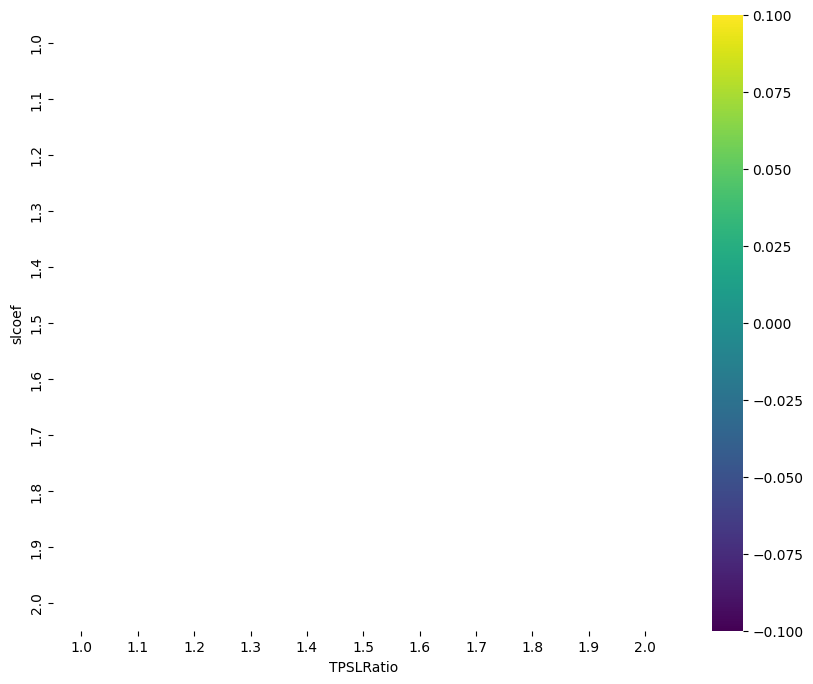

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [66]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.Low[i]>df1.Low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.Low[i]<df1.Low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.High[i]<df1.High[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.High[i]>df1.High[i-1]):
            return 0
    return 1

In [67]:
length = len(df)
high = list(df['High'])
low = list(df['Low'])
close = list(df['Close'])
open = list(df['Open'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0

def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0

def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.High[l]-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c2 = abs(max(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c3 = min(df.Open[l],df.Close[l])<min(levels, key=lambda x:abs(x-df.High[l]))
    c4 = df.Low[l]<min(levels, key=lambda x:abs(x-df.High[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.Low[l]-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c2 = abs(min(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c3 = max(df.Open[l],df.Close[l])>min(levels, key=lambda x:abs(x-df.Low[l]))
    c4 = df.High[l]>min(levels, key=lambda x:abs(x-df.Low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [68]:
n1=2
n2=2
backCandles=30
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.Low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.High[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0

In [69]:
df['signal']=signal

In [70]:
df[df['signal']==1].count()

date           173
Open           173
High           173
Low            173
Close          173
volume         173
EMA            173
RSI            173
ATR            173
BBL_15_1.5     173
BBM_15_1.5     173
BBU_15_1.5     173
BBB_15_1.5     173
BBP_15_1.5     173
TotalSignal    173
signal         173
dtype: int64

In [71]:
print(df.head())

                        date      Open      High       Low     Close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  TotalSignal  signal  
0  11479.136823    0.381886    0.409493  

In [72]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 600e-4
            tp1 = self.data.Close[-1] + 450e-4
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 600e-4
            tp1 = self.data.Close[-1] - 450e-4
            self.sell(sl=sl1, tp=tp1)

In [73]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)
stat = bt.run()
stat

<ipython-input-73-35b3bb3d1889>:3: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

<ipython-input-73-35b3bb3d1889>:3: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    9998.0
Duration                               9998.0
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]               24.985375
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                  0.0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

In [74]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1575', ...)

In [75]:
pipdiff = 250*1e-4 #for TP
SLTPRatio = 1 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend

    return trendcat

<Axes: >

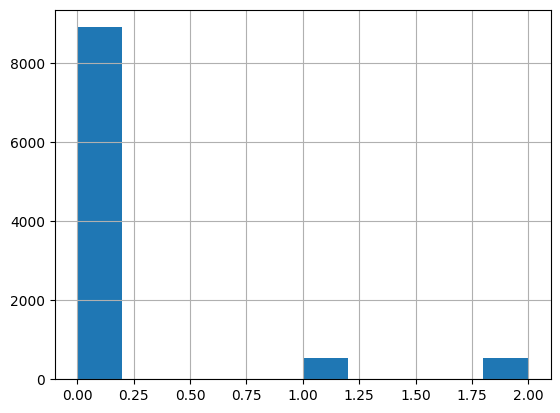

In [76]:
#!!! pitfall one category high frequency
df['Target'] = mytarget(30, df)
#df.tail(20)
#df['Target'] = df['Target'].astype(int)
df['Target'].hist()

In [77]:
print(df.head())

                        date      Open      High       Low     Close  volume  \
0  2020-09-11 10:20:00+05:30  11453.75  11461.00  11451.50  11453.30       0   
1  2020-09-11 10:25:00+05:30  11453.50  11465.75  11452.45  11463.20       0   
2  2020-09-11 10:30:00+05:30  11461.75  11462.55  11447.00  11457.05       0   
3  2020-09-11 10:35:00+05:30  11457.20  11461.35  11449.65  11454.70       0   
4  2020-09-11 10:40:00+05:30  11454.50  11465.10  11453.40  11460.75       0   

            EMA        RSI        ATR    BBL_15_1.5    BBM_15_1.5  \
0  11441.207894  53.515154  17.223618  11435.383177  11457.260000   
1  11442.626740  59.352950  16.663101  11435.899271  11457.850000   
2  11443.557273  54.618448  16.596944  11435.585942  11457.420000   
3  11444.276158  52.829257  15.897380  11435.680672  11455.843333   
4  11445.338987  56.870686  15.297754  11439.335158  11453.786667   

     BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  TotalSignal  signal  Target  
0  11479.136823    0.381886    0.

In [78]:
attributes = ['RSI', 'signal', 'Target' , 'date']
df_model= df[attributes].copy()

df_model['signal'] = pd.Categorical(df_model['signal'])
dfDummies = pd.get_dummies(df_model['signal'], prefix = 'signalcategory')
df_model= df_model.drop(['signal'], axis=1)
df_model = pd.concat([df_model, dfDummies], axis=1)
df_model

,RSI,Target,date,signalcategory_0,signalcategory_1,signalcategory_2
0,53.515154,0.0,2020-09-11 10:20:00+05:30,True,False,False
1,59.352950,0.0,2020-09-11 10:25:00+05:30,True,False,False
2,54.618448,0.0,2020-09-11 10:30:00+05:30,True,False,False
3,52.829257,0.0,2020-09-11 10:35:00+05:30,True,False,False
4,56.870686,0.0,2020-09-11 10:40:00+05:30,True,False,False
...,...,...,...,...,...,...
9994,38.706310,NaN,2021-03-25 15:00:00+05:30,True,False,False
9995,35.904631,NaN,2021-03-25 15:05:00+05:30,True,False,False
9996,33.109348,NaN,2021-03-25 15:10:00+05:30,False,False,True
9997,33.325093,NaN,2021-03-25 15:15:00+05:30,True,False,False


In [79]:
!pip install imblearn
!pip install xgboost

In [80]:
df_model['Target'] = df_model['Target'].fillna(0 )


In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']
X = df_model[attributes]
y = df_model['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 89.9843%
****Test Results****
Accuracy: 87.8000%


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[6293    1    0]
 [ 356    5    0]
 [ 344    0    0]]
[[2634    3    0]
 [ 173    0    0]
 [ 190    0    0]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      6294
         1.0       0.83      0.01      0.03       361
         2.0       0.00      0.00      0.00       344

    accuracy                           0.90      6999
   macro avg       0.58      0.34      0.32      6999
weighted avg       0.85      0.90      0.85      6999

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2637
         1.0       0.00      0.00      0.00       173
         2.0       0.00      0.00      0.00       190

    accuracy                           0.88      3000
   macro avg       0.29      0.33      0.31      3000
weighted avg       0.77      0.88      0.82      3000

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

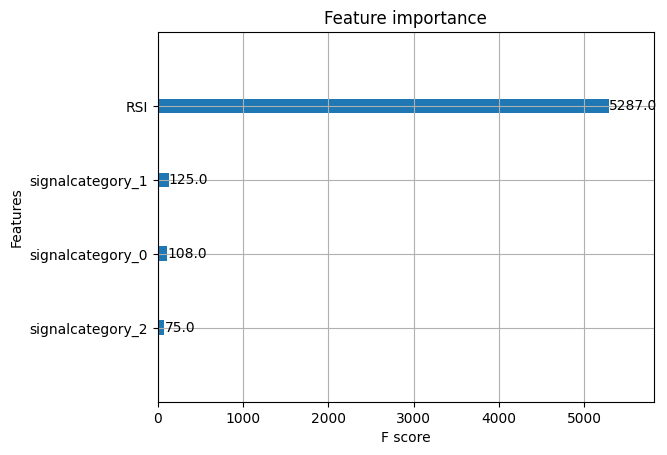

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


In [83]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)

In [84]:
from sklearn.neural_network import MLPClassifier

attributes = ['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']
X = df_model[attributes]
y = df_model['Target']

train_pct_index = int(0.6 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

NN = MLPClassifier(hidden_layer_sizes=(50, 50, 60, 30, 9), random_state=100, verbose=0, max_iter=1000, activation='relu')
NN.fit(X_train, y_train)
pred_train = NN.predict(X_train)
pred_test = NN.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("="*20)

print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 90.1484%
****Test Results****
Accuracy: 88.0750%


In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)

[[5408    0    0]
 [ 305    0    0]
 [ 286    0    0]]
[[3523    0    0]
 [ 229    0    0]
 [ 248    0    0]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      5408
         1.0       0.00      0.00      0.00       305
         2.0       0.00      0.00      0.00       286

    accuracy                           0.90      5999
   macro avg       0.30      0.33      0.32      5999
weighted avg       0.81      0.90      0.85      5999

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      3523
         1.0       0.00      0.00      0.00       229
         2.0       0.00      0.00      0.00       248

    accuracy                           0.88      4000
   macro avg       0.29      0.33      0.31      4000
weighted avg       0.78      0.88      0.82      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p